In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import umap
import umap.plot
from collections import defaultdict
from bokeh.palettes import Category20b

C:\Users\Camila - bioinfo\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,
C:\Users\Camila - bioinfo\anaconda3\Lib\site-packages\umap\plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)


In [43]:
pca_ld03 = pd.read_csv('PCA_LD_03.eigenvec', sep=' ', header=None)
pca_ld08 = pd.read_csv('PCA_LD_08.eigenvec', sep=' ', header=None)

In [44]:
kgp = pd.read_csv('1000GenomesPops.txt', sep='\t')
nat = pd.read_csv('NAT.txt', sep='\t', header=None).drop(columns=[1])

#'AMR': ['CLM', 'MXL', 'PEL', 'PUR']

populations = ['CDX', 'CEU', 'CHB', 'CHS', 'ESN',
       'FIN', 'GBR', 'GWD', 'IBS', 'JPT', 'KHV', 'LWK',
       'MSL', 'TSI', 'YRI']

pop_kgp = kgp.loc[kgp['SubPopulation'].isin(populations)] #filtrando as subpopulações
pop_kgp =pop_kgp.drop(columns=['Family.ID', 'Population.Description', 'Gender']) #excluindo colunas

nat.rename(columns={0: "Sample"}, inplace=True) #renomeando coluna
nat = nat.assign(SubPopulation = 'NAT', Population='NAT') #adicionando colunas de subpop e pop

target_pop = pd.concat([pop_kgp, nat], ignore_index=True) #concatenação dos dataframes

In [45]:
pca_ld03 = pca_ld03[pca_ld03[1].isin(target_pop['Sample'])]
pca_ld08 = pca_ld08[pca_ld08[1].isin(target_pop['Sample'])]
target_pop = target_pop[target_pop['Sample'].isin(pca_ld03[0])]

In [46]:
popul_by_ind = defaultdict(int)

for tupla in target_pop.itertuples():
    sample = tupla[1]
    subpop = tupla[2]
    pop = tupla[3]
    popul_by_ind[sample] = subpop #sample de cada subpopulação

In [47]:
pop_by_continent = {'EAS': ['CDX', 'CHB', 'JPT', 'KHV', 'CHS'],
 'AFR': ['ESN', 'GWD', 'LWK', 'MSL', 'YRI'],
 'EUR': ['GBR', 'FIN', 'IBS', 'TSI', 'CEU'],
 #'AMR': ['CLM', 'MXL', 'PEL', 'PUR'],
 'NAT':['NAT']}

In [48]:
continents = list(pop_by_continent.keys()) #continentes
individuals = list(pca_ld03[0]) #sample dos individuos

In [49]:
idx_pops_members = defaultdict(list)
for idx, individual in enumerate(individuals):
    idx_pops_members[popul_by_ind[individual]].append(idx) #indicie dos individuos

In [50]:
pca_ld3 = pca_ld03.drop(columns=[0,1]) #excluindo colunas de sample
pca_ld8 = pca_ld08.drop(columns=[0,1]) 

PCA_LD3 = pd.concat([pca_ld3.reset_index(), target_pop.reset_index()], axis=1)
PCA_LD8 = pd.concat([pca_ld8.reset_index(), target_pop.reset_index()], axis=1)

PCA_LD3.drop(columns=["index"], inplace=True)
PCA_LD8.drop(columns=["index"], inplace=True)

#np.savetxt("PCA_ld3_sem_miscig.csv", PCA_LD3, fmt='%s')
#np.savetxt("PCA_ld8_sem_miscig.csv", PCA_LD8, fmt='%s')

In [51]:
pca_ld3 = pca_ld3.to_numpy(dtype='float32') #transformando em array
pca_ld8 = pca_ld8.to_numpy(dtype='float32')

In [86]:
umap_proj3 = umap.UMAP(densmap=True, n_neighbors=200, min_dist=0.5).fit(pca_ld3[:, :])
umap_proj8 = umap.UMAP(densmap=True, n_neighbors=200, min_dist=0.5).fit(pca_ld8[:, :])


#densmap
#dens_lambda: it controls how strongly the local density regularisation acts 
#np.savetxt("umap_03_nn200_md0_com_miscig.csv", umap_proj3.embedding_)
#np.savetxt("umap_08_nn200_md0_com_miscig.csv", umap_proj8.embedding_)

In [53]:
color_dict = {'EAS':'#FF00B1',
              'EUR':'#0019FF',
              'AFR':'#299438',
             #'AMR':'#FFFF00',
             'NAT':'#FF7300'}

In [14]:
#umap.plot.connectivity(umap_proj3, show_points=True)

In [54]:
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects

# parameters for plots
point_alpha = 0.5 # alpha parameter for points
fsize = 20 # font size for labels
lwidth = 0.5 # line width for labels

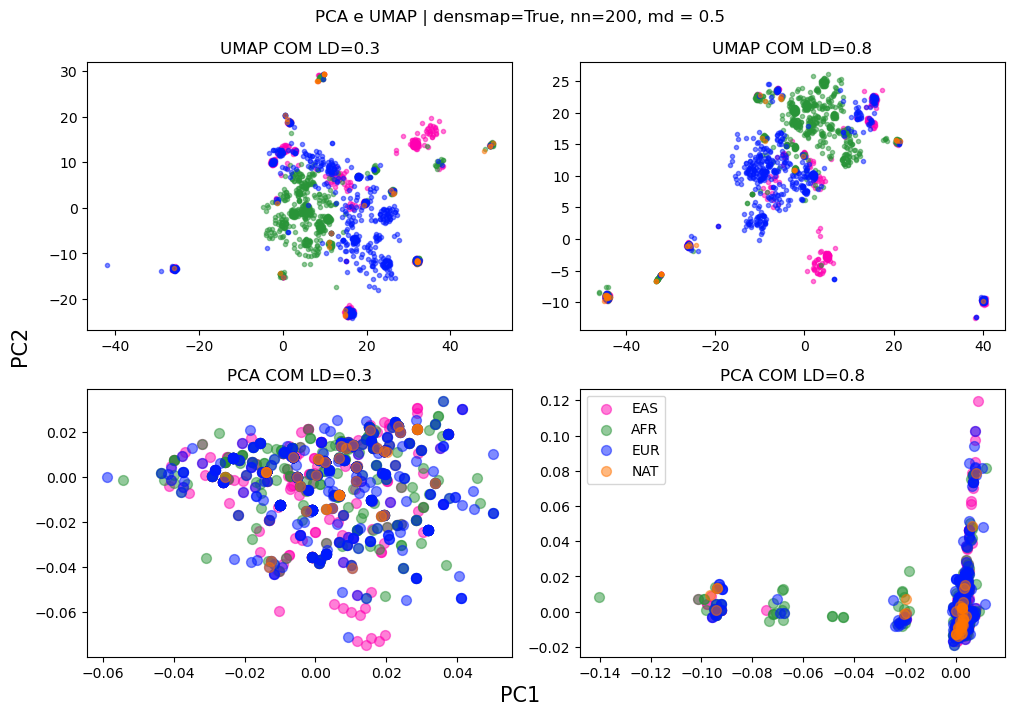

In [87]:

fig, axs = plt.subplots(2, 2, figsize=(10,7))
dset = umap_proj3.embedding_
dset8 = umap_proj8.embedding_

for cont in continents: 
    for pop in pop_by_continent[cont]:
        temp_proj = dset[idx_pops_members[pop]]
        axs[0,0].plot(temp_proj[:,0], temp_proj[:,1], '.', color = color_dict[cont], alpha=point_alpha)

#axs[0,0].set_xlabel("UMAP1")
#axs[0,0].set_ylabel("UMAP2")
axs[0,0].set_title("UMAP COM LD=0.3")

for cont in continents: 
    for pop in pop_by_continent[cont]:
        temp_proj = dset8[idx_pops_members[pop]]
        axs[0,1].plot(temp_proj[:,0], temp_proj[:,1], '.', color = color_dict[cont], alpha=point_alpha)
        

#axs[0,1].set_xlabel("UMAP1")
#axs[0,1].set_ylabel("UMAP2")
axs[0,1].set_title("UMAP COM LD=0.8")

# '#FFFF00' AMR

colors = ['#FF00B1', 
          '#299438',
          '#0019FF', 
          #'#FFFF00'
         '#FF7300']

for target, color in zip(continents,colors):
    indicesToKeep = PCA_LD3['Population'] == target
    indicToKeep = PCA_LD8['Population'] == target
    axs[1,0].scatter(PCA_LD3.loc[indicesToKeep, 2]
               , PCA_LD3.loc[indicesToKeep, 3], c = color, s = 50, alpha=0.5)
    axs[1,1].scatter(PCA_LD8.loc[indicToKeep, 2]
               , PCA_LD8.loc[indicToKeep, 3], c = color, s = 50, alpha=0.5)

axs[1,1].legend(continents,prop={'size':10}, fontsize=10)
#axs[1,0].set_xlabel("UMAP1")
#axs[1,0].set_ylabel("UMAP2")
axs[1,0].set_title("PCA COM LD=0.3")
axs[1,1].set_title("PCA COM LD=0.8")

fig.suptitle('PCA e UMAP | densmap=True, nn=200, md = 0.5')
fig.text(0.5, 0.0006, 'PC1', ha='center', va='center', fontsize=15)
fig.text(0.0001, 0.5, 'PC2', ha='center', va='center', rotation='vertical', fontsize=15)

plt.style.use(['default'])
fig.tight_layout()
plt.savefig(('UMAP e PCA_12' + '.png'), bbox_inches = 'tight')
#plt.savefig('UMAP e PCA.png', dpi=300)

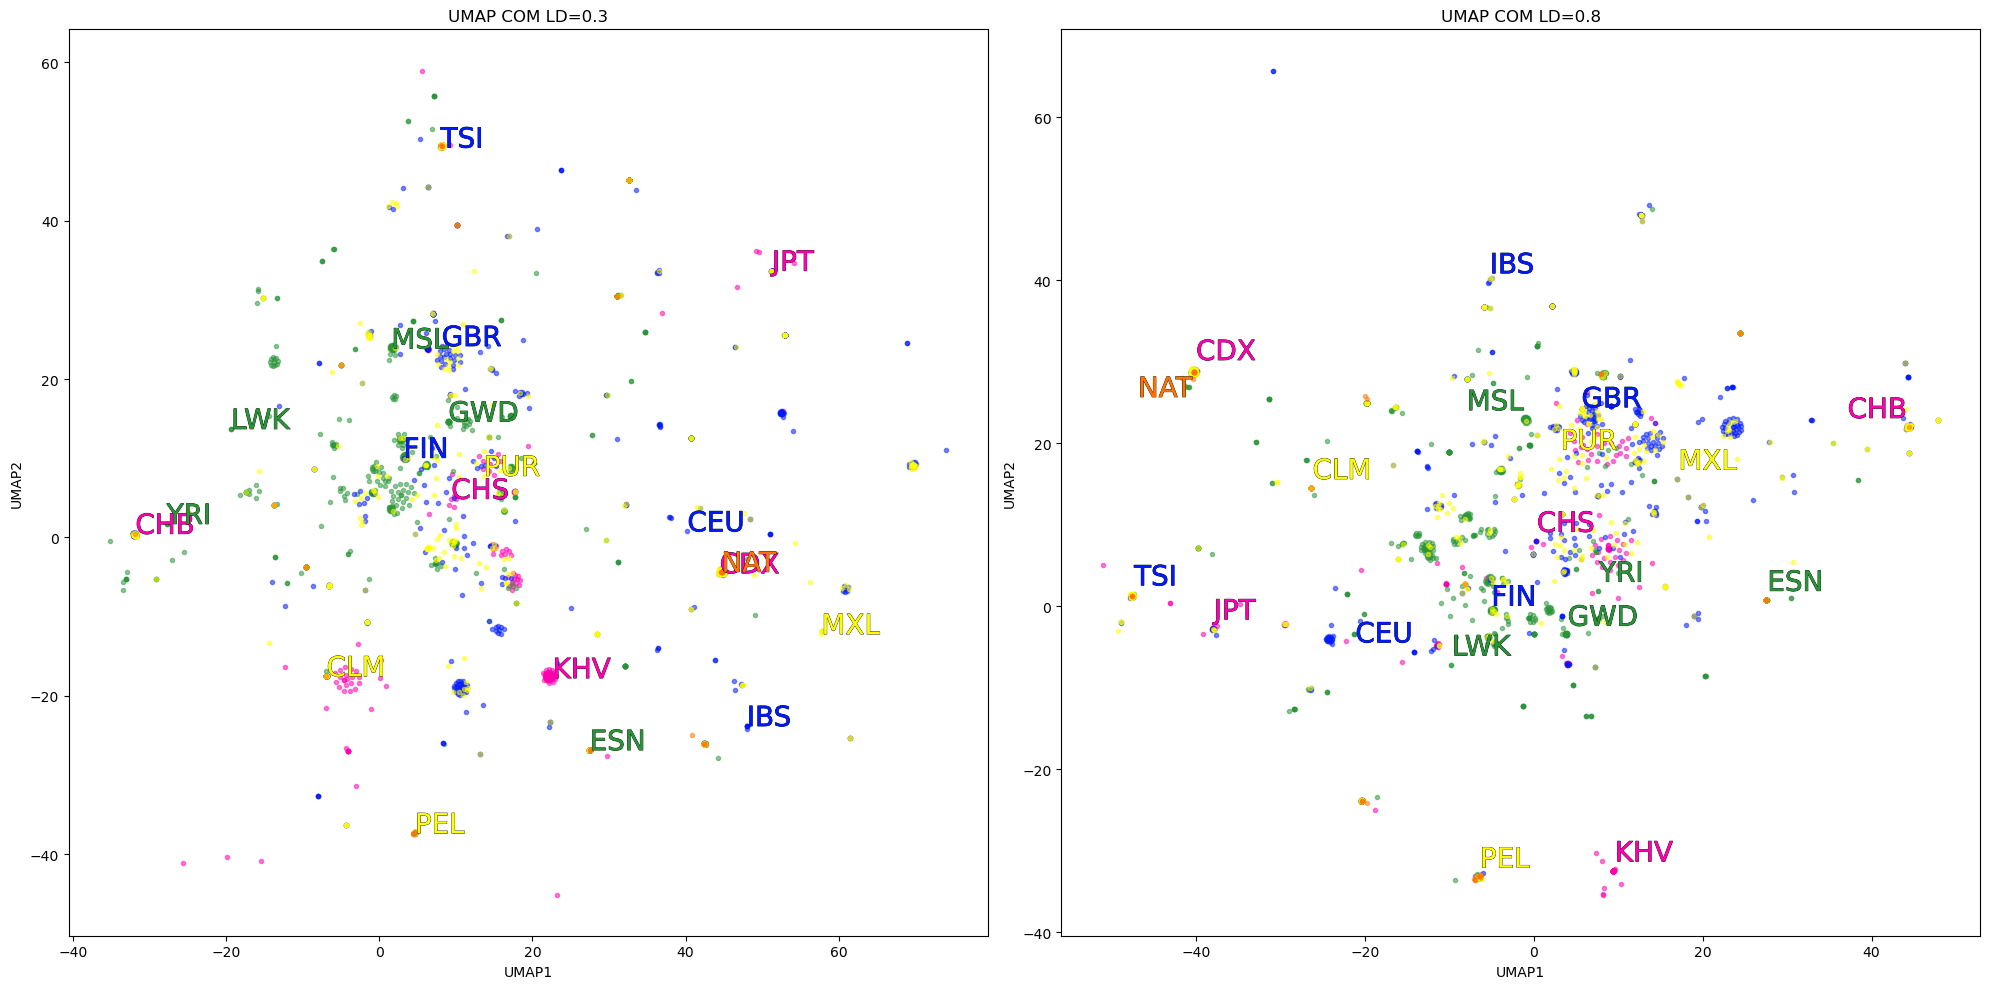

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
dset = umap_proj3.embedding_
dset8 = umap_proj8.embedding_

texts1 = []
texts2 = []

for cont in continents: 
    for pop in pop_by_continent[cont]:
        temp_proj = dset[idx_pops_members[pop]]
        ax1.plot(temp_proj[:,0], temp_proj[:,1], '.', color = color_dict[cont], alpha=point_alpha)
        
        for i, temp_proj_sub in enumerate(temp_proj):
            if i==temp_proj.shape[0]-1:
                texts1.append(ax1.text(temp_proj_sub[0], temp_proj_sub[1], pop,
                                     fontdict={"color": color_dict[cont], "size": fsize},
                                     path_effects=[PathEffects.withStroke(linewidth=lwidth, foreground="black")]))

#adjust_text(texts1)
plt.style.use(['default'])
ax1.set_xlabel("UMAP1")
ax1.set_ylabel("UMAP2")
ax1.set_title("UMAP COM LD=0.3")

for cont in continents: 
    for pop in pop_by_continent[cont]:
        temp_proj = dset8[idx_pops_members[pop]]
        ax2.plot(temp_proj[:,0], temp_proj[:,1], '.', color = color_dict[cont], alpha=point_alpha)
        
        for i, temp_proj_sub in enumerate(temp_proj):
            if i==temp_proj.shape[0]-1:
                texts2.append(ax2.text(temp_proj_sub[0], temp_proj_sub[1], pop,
                                     fontdict={"color": color_dict[cont], "size": fsize},
                                     path_effects=[PathEffects.withStroke(linewidth=lwidth, foreground="black")]))

adjust_text(texts2)
plt.style.use(['default'])
ax2.set_xlabel("UMAP1")
ax2.set_ylabel("UMAP2")
ax2.set_title("UMAP COM LD=0.8")

fig.tight_layout()
#plt.savefig('UMAP with and without LD.png', dpi=300)

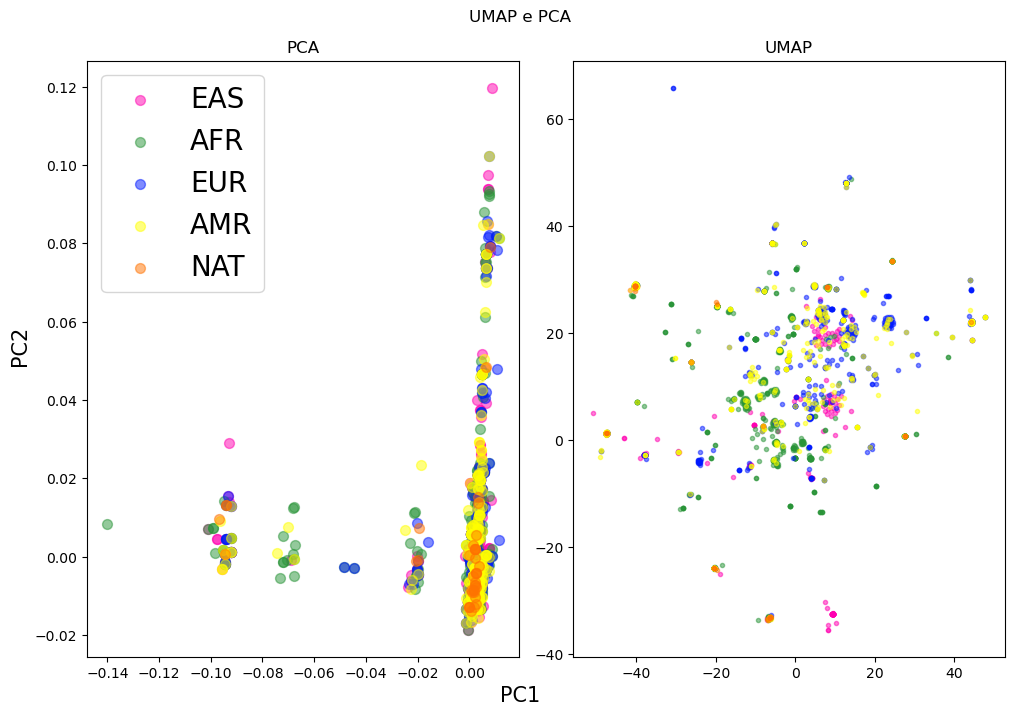

In [33]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,7))
dset = umap_proj3.embedding_
dset8 = umap_proj8.embedding_

colors = ['#FF00B1', '#299438','#0019FF','#FFFF00', '#FF7300']

for target, color in zip(continents,colors):
    indicToKeep = PCA_LD8['Population'] == target
    ax1.scatter(PCA_LD8.loc[indicToKeep, 2]
               , PCA_LD8.loc[indicToKeep, 3], c = color, s = 50, alpha=0.5)

for cont in continents: 
    for pop in pop_by_continent[cont]:
        temp_proj = dset8[idx_pops_members[pop]]
        ax2.plot(temp_proj[:,0], temp_proj[:,1], '.', color = color_dict[cont], alpha=point_alpha)
        

#axs[0,1].set_xlabel("UMAP1")
#axs[0,1].set_ylabel("UMAP2")
ax2.set_title("UMAP")
ax1.set_title("PCA")

# '#FFFF00' AMR
ax1.legend(continents,prop={'size': 20})
fig.suptitle('UMAP e PCA')
fig.text(0.5, 0.0006, 'PC1', ha='center', va='center', fontsize=15)
fig.text(0.0001, 0.5, 'PC2', ha='center', va='center', rotation='vertical', fontsize=15)

plt.style.use(['default'])
fig.tight_layout()
plt.savefig(('UMAP e PCA_onco' + '.png'), bbox_inches = 'tight')
#plt.savefig('UMAP e PCA.png', dpi=300)